# Project 3 - Avocado Dataset in US (Dynamic)

In [1]:
#data analysis libraries 
import pandas as pd
import numpy as np
import datetime

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [2]:
# Importing the file and loading the dataset

df = pd.read_csv('Data/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Dropping the unnamed column

df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
# removed the blanked rows by using iloc function and taking rows till 1510

df = df.iloc[:1511, :]

In [5]:
# Checking the dataset again after removing blank rows and unwanted columns
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,27-11-2016,1.54,131453.85,38976.01,34346.09,8265.03,49866.72,44005.31,5861.41,0.00,conventional,2016.0,Charlotte
1507,20-11-2016,1.57,135608.11,44044.69,28907.47,13913.04,48742.91,42721.62,6021.29,0.00,conventional,2016.0,Charlotte
1508,13-11-2016,1.64,144089.12,49399.39,26597.39,22714.68,45377.66,38436.79,6940.87,0.00,conventional,2016.0,Charlotte
1509,06-11-2016,1.57,142095.92,36840.74,27501.34,25305.86,52447.98,45861.67,6586.31,0.00,conventional,2016.0,Charlotte


In [6]:
# Renaming the 3 columns
df.rename(columns = {'4046':'PLU4046', '4225':'PLU4225', '4770':'PLU4770'}, inplace = True)

In [7]:
df

,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,27-11-2016,1.54,131453.85,38976.01,34346.09,8265.03,49866.72,44005.31,5861.41,0.00,conventional,2016.0,Charlotte
1507,20-11-2016,1.57,135608.11,44044.69,28907.47,13913.04,48742.91,42721.62,6021.29,0.00,conventional,2016.0,Charlotte
1508,13-11-2016,1.64,144089.12,49399.39,26597.39,22714.68,45377.66,38436.79,6940.87,0.00,conventional,2016.0,Charlotte
1509,06-11-2016,1.57,142095.92,36840.74,27501.34,25305.86,52447.98,45861.67,6586.31,0.00,conventional,2016.0,Charlotte


In [8]:
# Check the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1511 non-null   object 
 1   AveragePrice  1511 non-null   float64
 2   Total Volume  1511 non-null   float64
 3   PLU4046       1511 non-null   float64
 4   PLU4225       1511 non-null   float64
 5   PLU4770       1511 non-null   float64
 6   Total Bags    1511 non-null   float64
 7   Small Bags    1511 non-null   float64
 8   Large Bags    1511 non-null   float64
 9   XLarge Bags   1511 non-null   float64
 10  type          1511 non-null   object 
 11  year          1511 non-null   float64
 12  region        1511 non-null   object 
dtypes: float64(10), object(3)
memory usage: 153.6+ KB


Observation:
    1. Date is in object, so we have to convert the Date to Datetime. Once convert then sort according to Datetime
    2. Year is in float type, so converting float to int

In [9]:
df['year'] = df['year'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1511 non-null   object 
 1   AveragePrice  1511 non-null   float64
 2   Total Volume  1511 non-null   float64
 3   PLU4046       1511 non-null   float64
 4   PLU4225       1511 non-null   float64
 5   PLU4770       1511 non-null   float64
 6   Total Bags    1511 non-null   float64
 7   Small Bags    1511 non-null   float64
 8   Large Bags    1511 non-null   float64
 9   XLarge Bags   1511 non-null   float64
 10  type          1511 non-null   object 
 11  year          1511 non-null   int32  
 12  region        1511 non-null   object 
dtypes: float64(9), int32(1), object(3)
memory usage: 147.7+ KB


In [10]:
Dates = [datetime.datetime.strptime(i, "%d-%m-%Y") for i in df['Date']]
Dates.sort()
sorteddates = [datetime.datetime.strftime(i, "%d-%m-%Y") for i in Dates]
df['Date'] = pd.DataFrame({'Date':sorteddates})
# df['day'], df['month'], df['year'] = df['Date'].str.split('-').str
df.head(10)

,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,04-01-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,04-01-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,04-01-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,04-01-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,04-01-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,04-01-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,04-01-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,04-01-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,04-01-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,04-01-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


## Missing Values

In [11]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
PLU4046         0
PLU4225         0
PLU4770         0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Summary Statstics

In [12]:
df.describe()

,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1511.000000,1.511000e+03,1.511000e+03,1.511000e+03,1.511000e+03,1.511000e+03,1.511000e+03,1.511000e+03,1511.000000,1511.000000
mean,1.073435,1.607520e+06,6.488074e+05,6.136610e+05,5.053415e+04,2.945178e+05,2.495516e+05,4.277644e+04,2189.729610,2015.159497
std,0.187621,4.441035e+06,1.951115e+06,1.675853e+06,1.380395e+05,7.593398e+05,6.486435e+05,1.184310e+05,7469.413182,0.366260
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.970000,1.473270e+05,2.028663e+04,4.147240e+04,8.936000e+02,3.612915e+04,2.968690e+04,5.286650e+02,0.000000,2015.000000
50%,1.080000,4.051382e+05,8.309726e+04,1.212695e+05,7.580380e+03,7.454211e+04,6.265711e+04,4.953570e+03,0.000000,2015.000000
75%,1.190000,9.870613e+05,3.797120e+05,4.862557e+05,3.019972e+04,1.580019e+05,1.466069e+05,2.985099e+04,404.780000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Observation:
    1. Min Average Price is 0.49 and max Average Price is 1.68
    2. Outliers may present in others except the Average price because there is more difference in 75% and max

## Correlation

In [13]:
df.corr()

,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.139066,-0.189251,-0.090127,-0.099511,-0.110052,-0.096040,-0.176674,-0.046476,0.163083
Total Volume,-0.139066,1.000000,0.985563,0.987149,0.934341,0.967677,0.960627,0.910195,0.521557,-0.001316
PLU4046,-0.189251,0.985563,1.000000,0.951934,0.898551,0.930369,0.922250,0.884190,0.473894,-0.038078
PLU4225,-0.090127,0.987149,0.951934,1.000000,0.927753,0.951761,0.943967,0.900463,0.504547,-0.004284
PLU4770,-0.099511,0.934341,0.898551,0.927753,1.000000,0.926394,0.923594,0.840485,0.645968,0.031668
Total Bags,-0.110052,0.967677,0.930369,0.951761,0.926394,1.000000,0.997340,0.911306,0.601730,0.093842
Small Bags,-0.096040,0.960627,0.922250,0.943967,0.923594,0.997340,1.000000,0.879091,0.611178,0.110259
Large Bags,-0.176674,0.910195,0.884190,0.900463,0.840485,0.911306,0.879091,1.000000,0.447612,-0.016269
XLarge Bags,-0.046476,0.521557,0.473894,0.504547,0.645968,0.601730,0.611178,0.447612,1.000000,0.223085
year,0.163083,-0.001316,-0.038078,-0.004284,0.031668,0.093842,0.110259,-0.016269,0.223085,1.000000


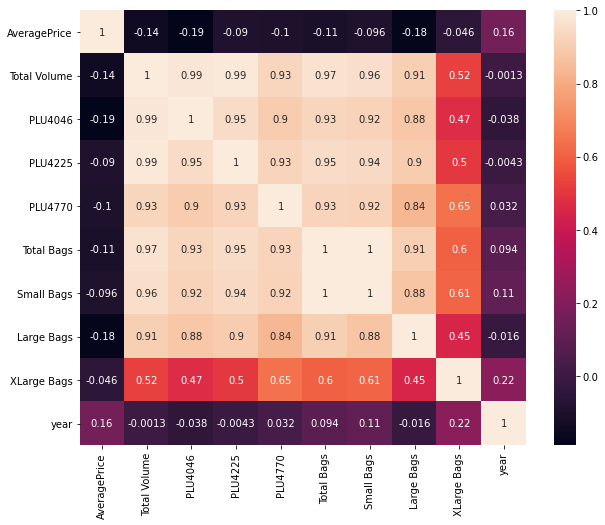

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

## Data Visualization

### Univarient Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

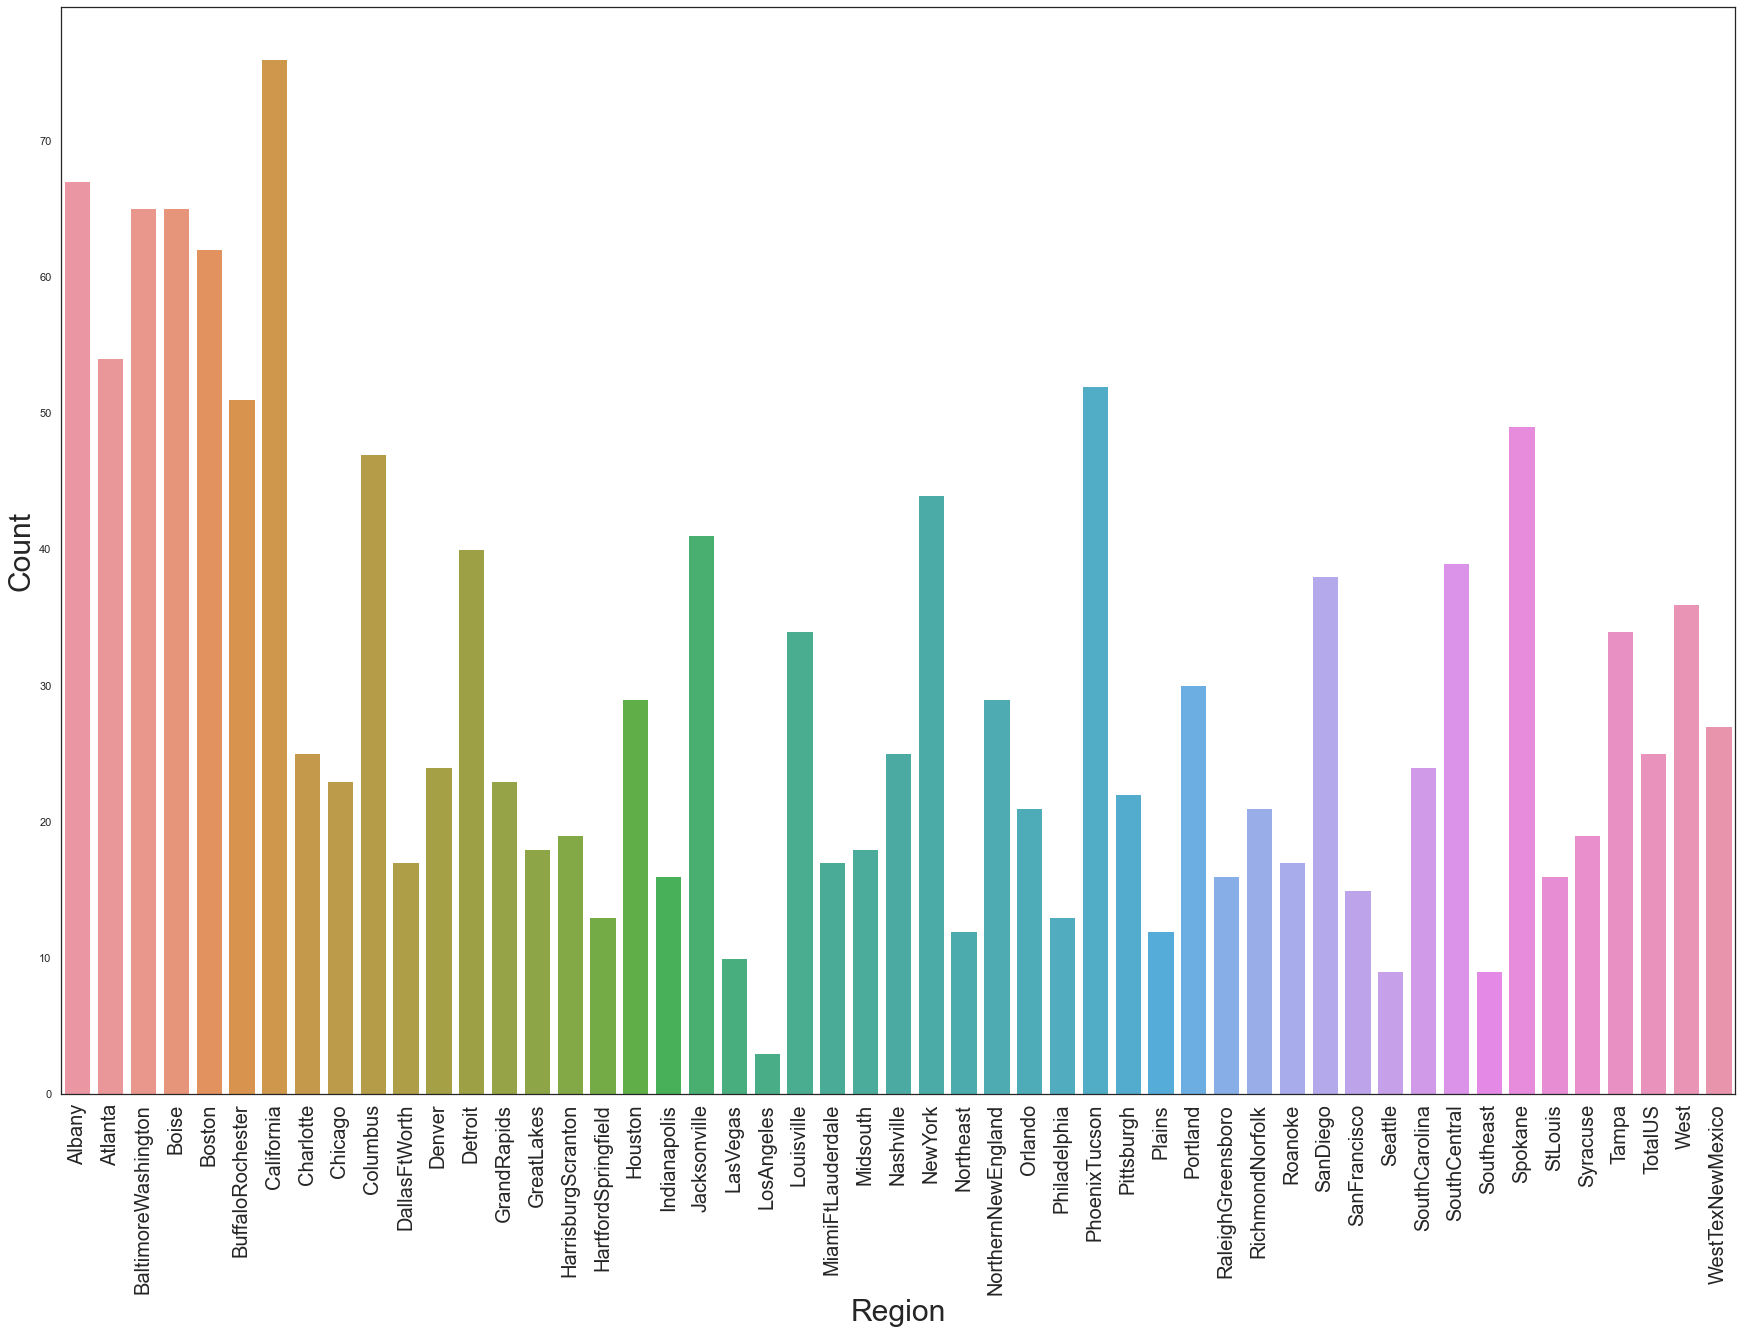

In [15]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[30,20])
sns.set(style='white')
sns.countplot(x = 'region', data = df)
plt.ylabel('Count', fontsize=30)
plt.xlabel('Region', fontsize=30)
plt.xticks(rotation = 90, fontsize=20)

Observation:
    1. Highest count i.e. more than 75 which is in California region
    2. Lowest  count i.e. less than 5 which is in LosAngeles

Text(0.5, 0, 'Year')

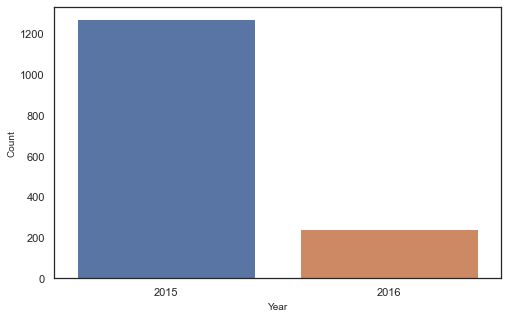

In [16]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[8,5])
sns.countplot(x = 'year', data = df)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Year', fontsize=10)
# plt.xticks(rotation = 90, fontsize=20)

Observation:
    1. Count more in 2015 i.e. 1250 approx
    2. Count less in 1016 i.e. 300 approx

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112]),
 <a list of 113 Text major ticklabel objects>)

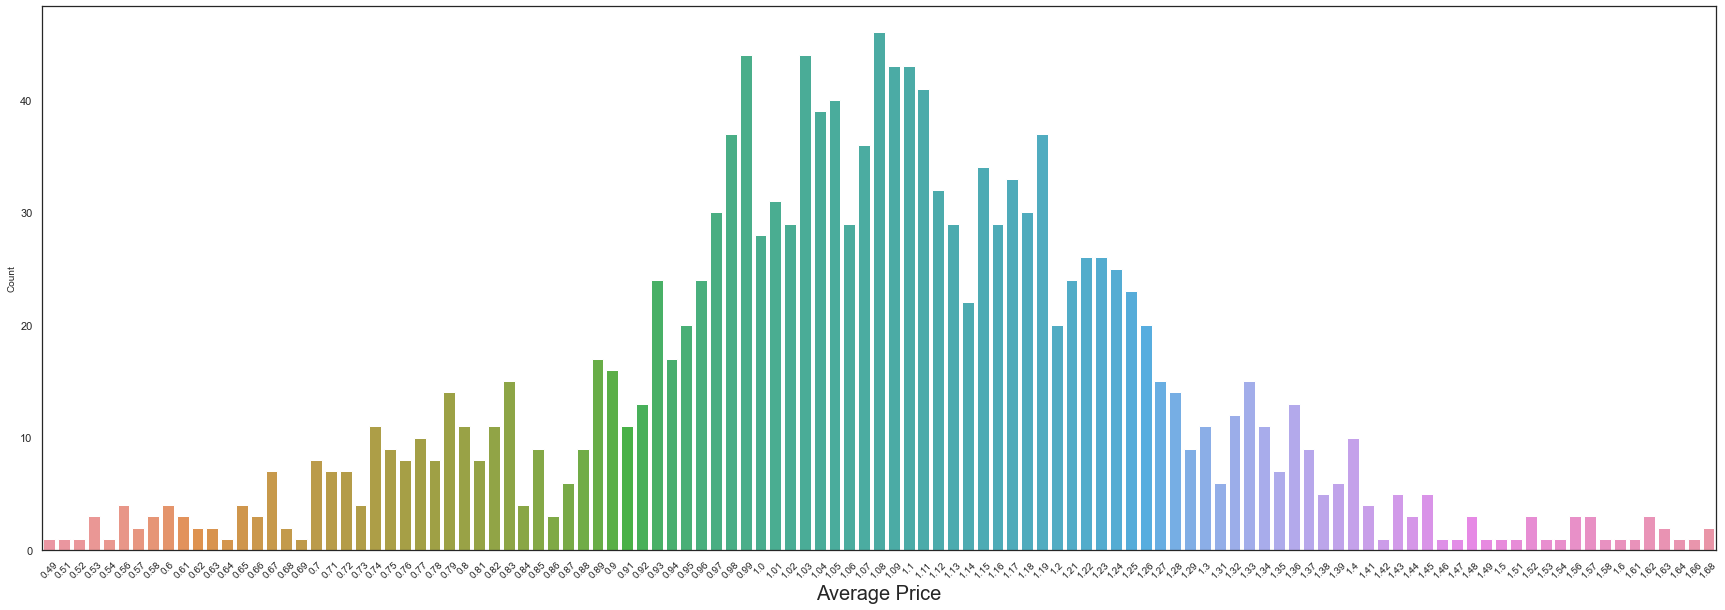

In [17]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[30,10])
sns.countplot(x = 'AveragePrice', data = df)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Average Price', fontsize=20)
plt.xticks(rotation = 45, fontsize=10)

Observation:
    1. 1.08 AveragePrice is highest

### Bivarient Analysis

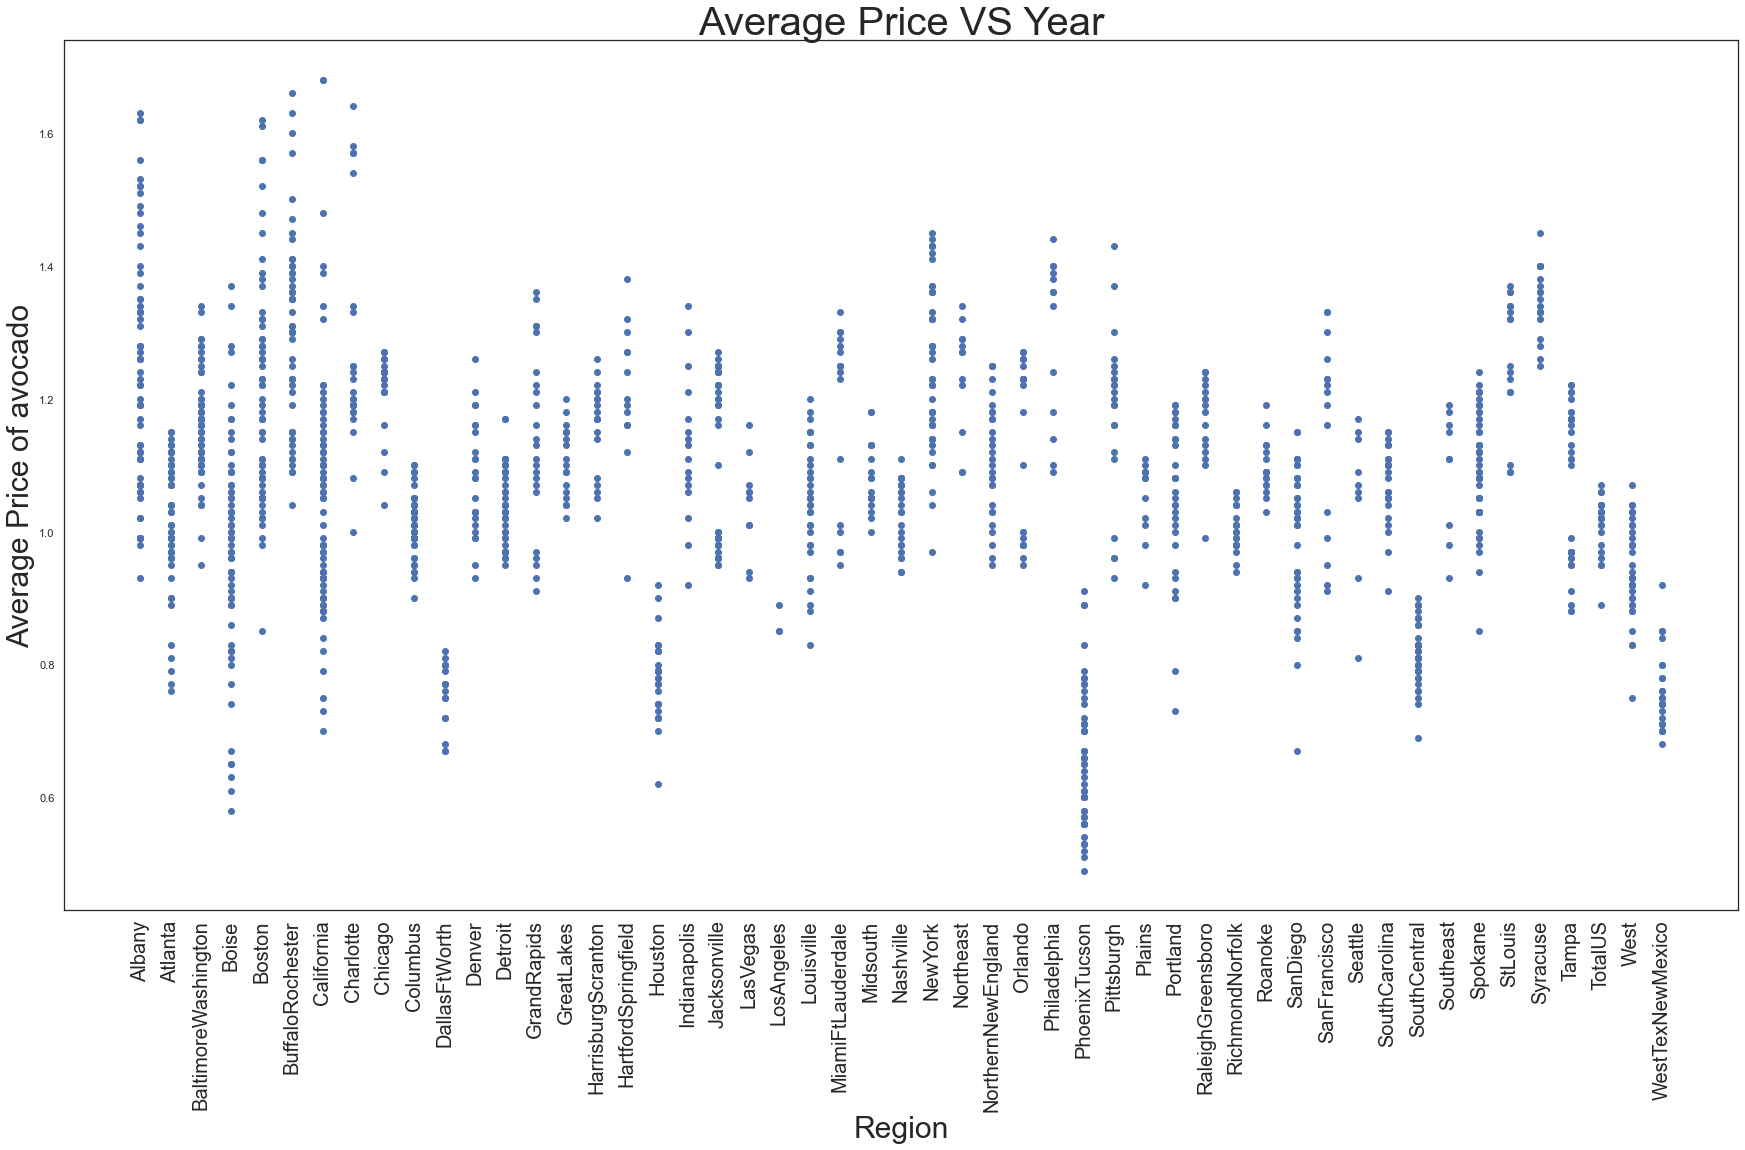

In [18]:
plt.figure(figsize=[30,16])
plt.title('Average Price VS Year', fontsize=40)
plt.scatter(df['region'], df['AveragePrice'])
plt.xlabel('Region', fontsize=30)
plt.ylabel('Average Price of avocado', fontsize=30)
plt.xticks(rotation = 90, fontsize=20)

plt.show()

Observation:
    1. Average Price of avocado is more in Albany, Boston, California
    2. Average Price of avocado is less in Phoenix Tucson

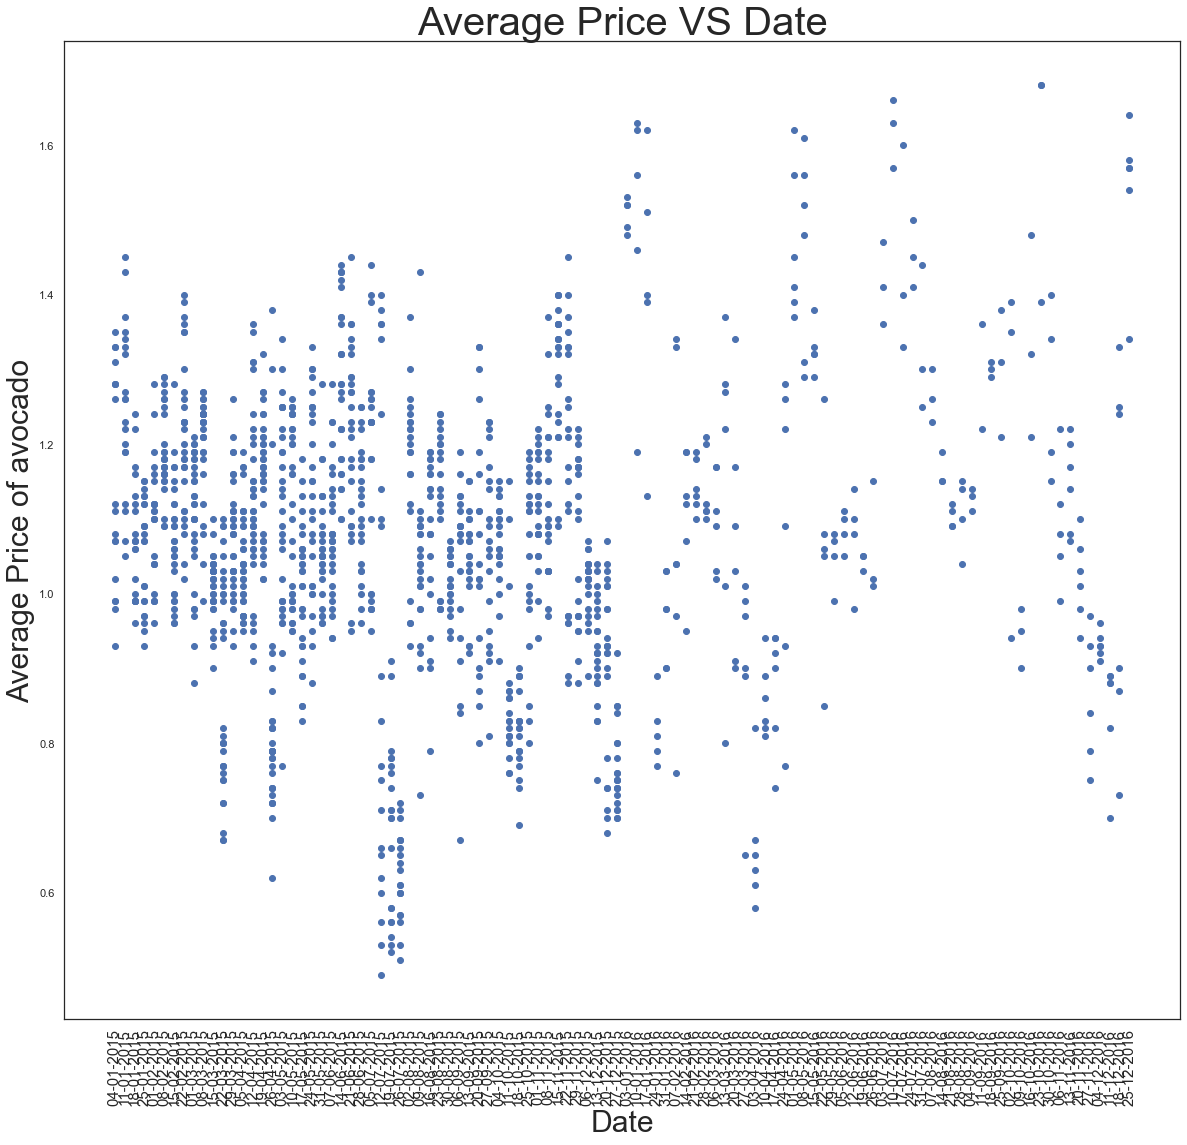

In [19]:
plt.figure(figsize=[20,18])
plt.title('Average Price VS Date', fontsize=40)
plt.scatter(df['Date'], df['AveragePrice'])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Average Price of avocado', fontsize=30)
plt.xticks(rotation = 90, fontsize=15)

plt.show()

Observation:
    1. From 04.01.2015 till 27.12.2015, the average Price of avocado more as compared to after 27.12.2015
    2. From 04.01.2015 till 27.12.2015, average price range in between 0.2 to 1.43
    3. After 27.12.2015, average price of avocado range is in between 0.5 till more than 1.6

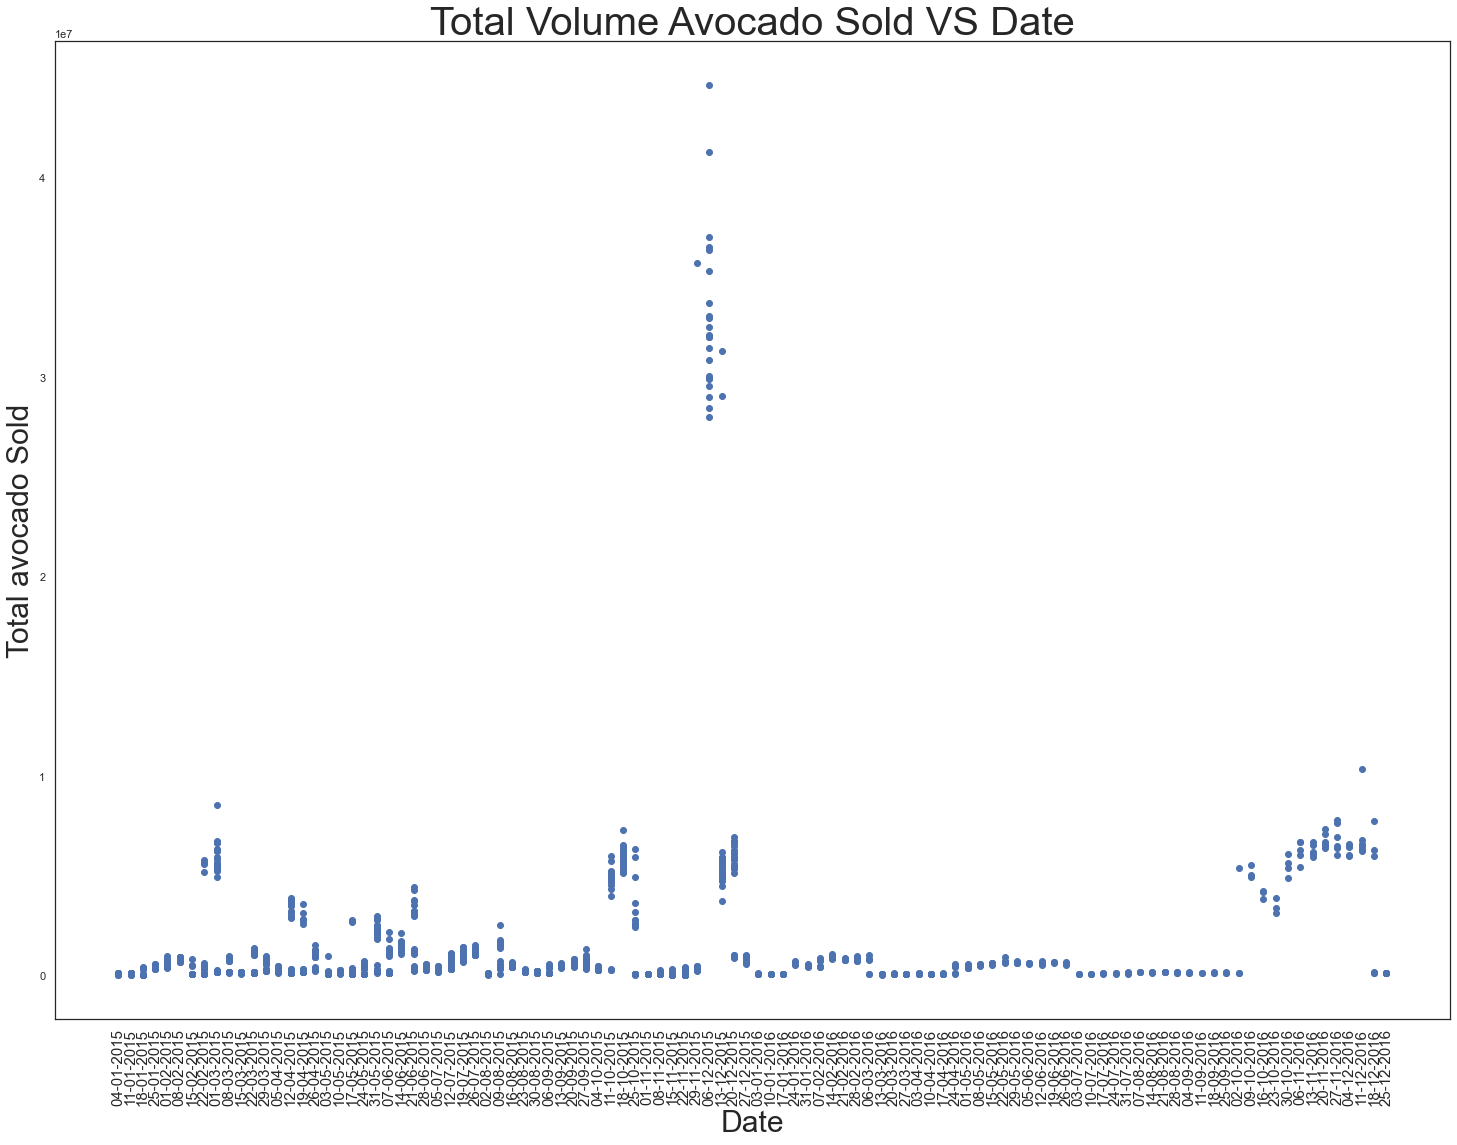

In [20]:
plt.figure(figsize=[25,18])
plt.title('Total Volume Avocado Sold VS Date', fontsize=40)
plt.scatter(df['Date'], df['Total Volume'])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Total avocado Sold', fontsize=30)
plt.xticks(rotation = 90, fontsize=15)

plt.show()

Observation: Avocado sold more on 13.12.2015

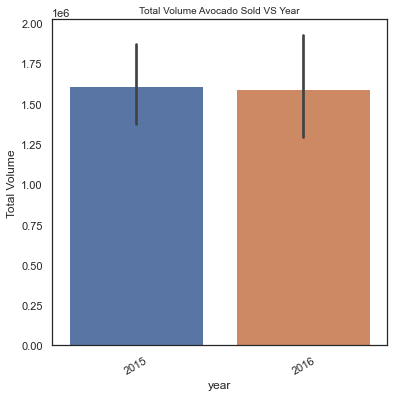

In [21]:
plt.figure(figsize=(6, 6))
sns.barplot(x='year', y='Total Volume', data=df)
plt.title('Total Volume Avocado Sold VS Year', fontsize=10)
plt.xticks(rotation=30)
plt.show()

Observation: More avocado sold in the year 2015

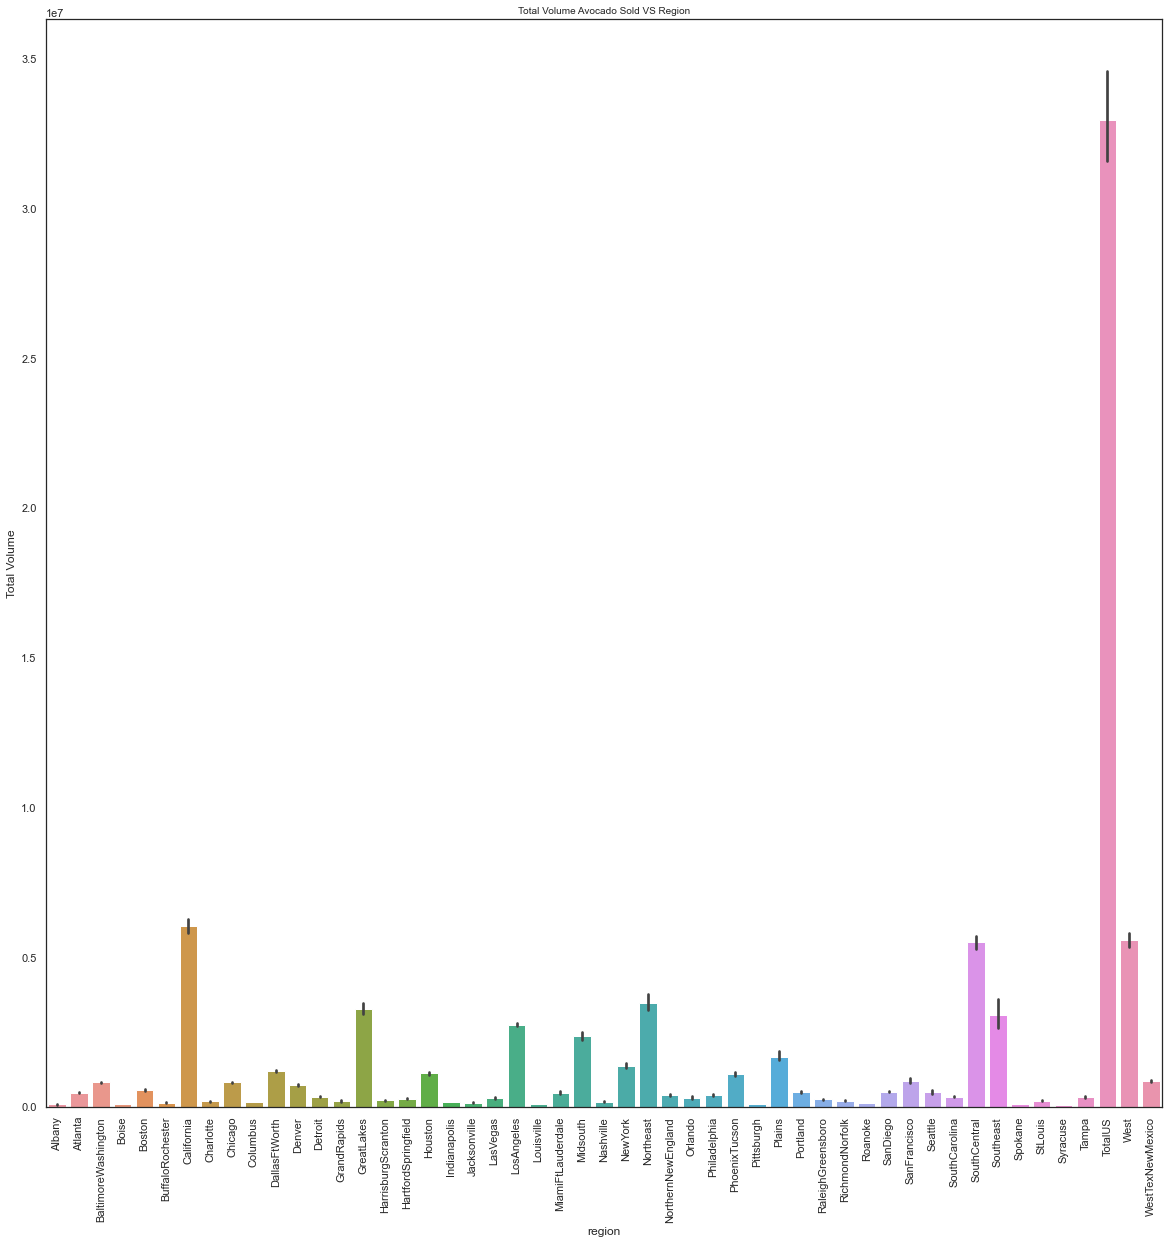

In [22]:
plt.figure(figsize=(20, 20))
sns.barplot(x='region', y='Total Volume', data=df)
plt.title('Total Volume Avocado Sold VS Region', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Observation: Max avocado sold in TotalUS Region and in Syracuse region very less volumne sold

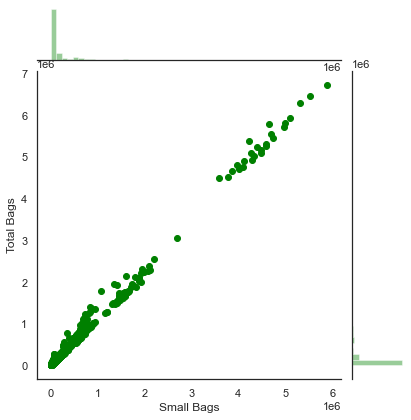

In [23]:
sns.jointplot(x='Small Bags',y='Total Bags',data=df, color='green')

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

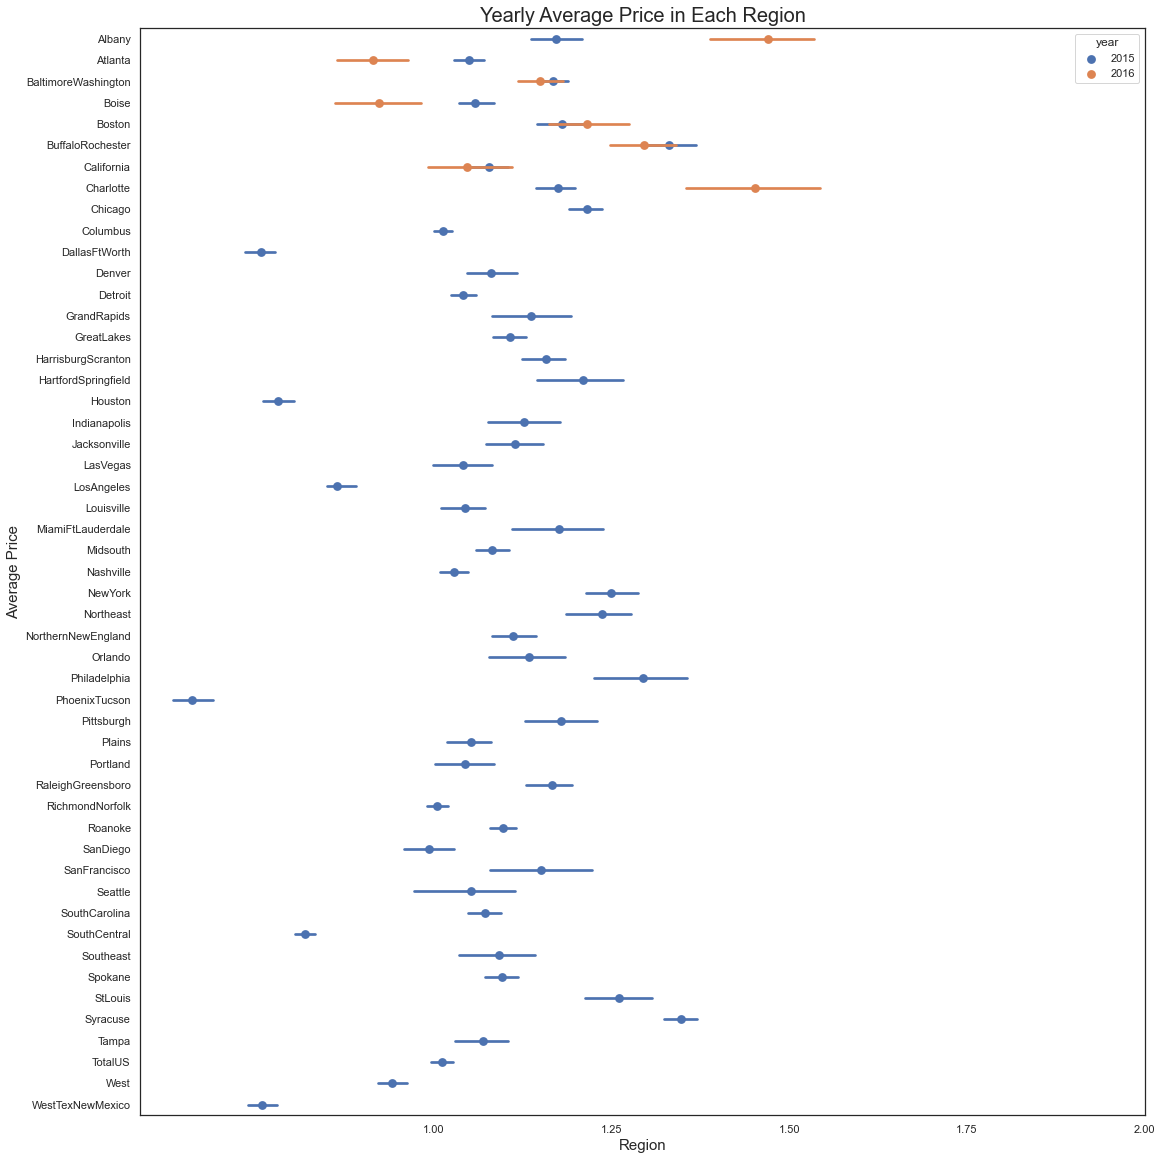

In [24]:
plt.figure(figsize=(18,20))
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region', fontsize=15)
plt.ylabel('Average Price', fontsize=15)
plt.title("Yearly Average Price in Each Region",fontsize=20)

Observation:
    Looks like there was a huge increase in Avocado prices as the demand was little high in Year 2015

In [25]:
# Dropping few unwanted columns

df.drop(['Date','type', 'year', 'region'],axis=1, inplace=True)

## Plotting Outliers

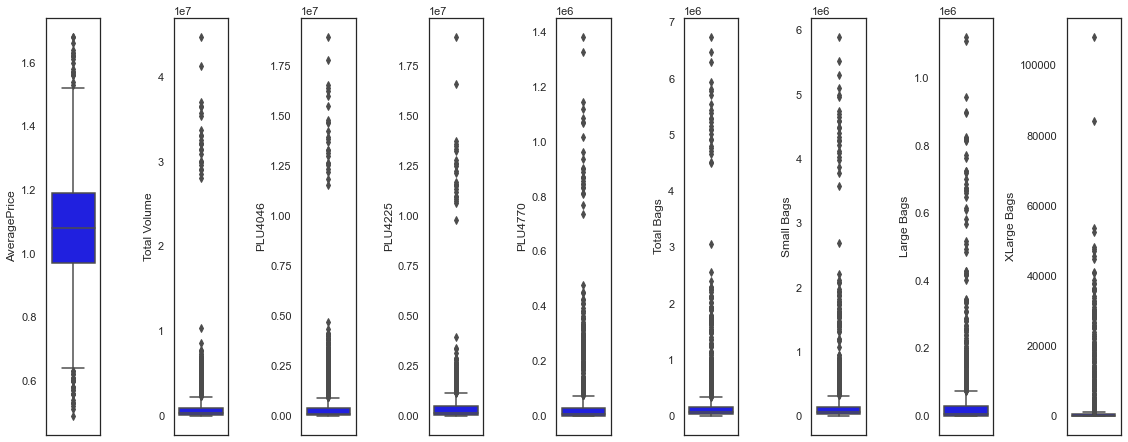

In [26]:
col = df.columns.values
ncol = 17
nrow = 10

plt.figure(figsize=(30, 60))
for i in range(0, len(col)):
    plt.subplot(nrow, ncol, i+1)
    sns.boxplot(df[col[i]], color='blue', orient='v')
    plt.tight_layout()

## Distibution of Skewness

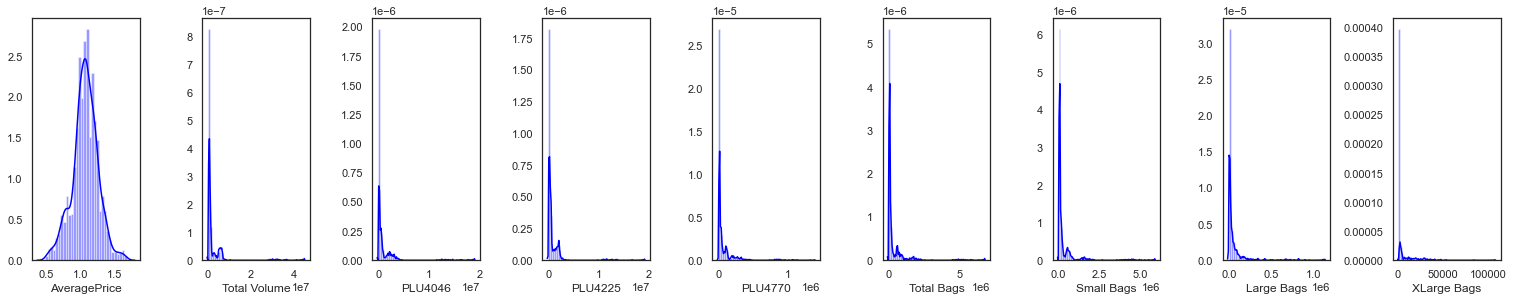

In [27]:
plt.figure(figsize=(40, 40))
for i in range(0, len(col)):
    plt.subplot(nrow, ncol, i+1)
    sns.distplot(df[col[i]], color='blue')
    plt.tight_layout()

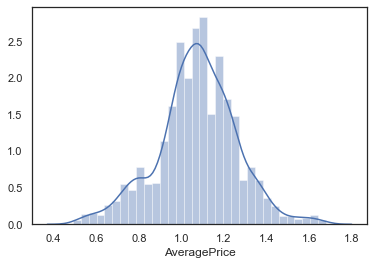

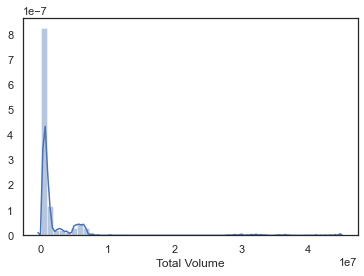

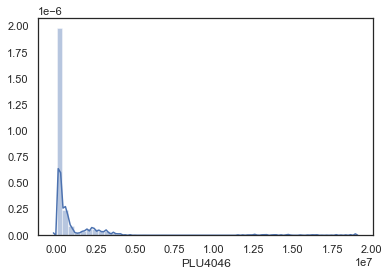

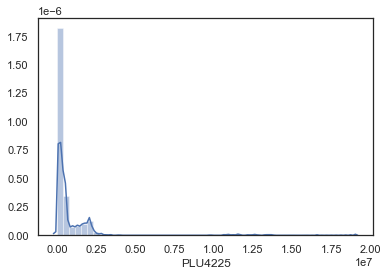

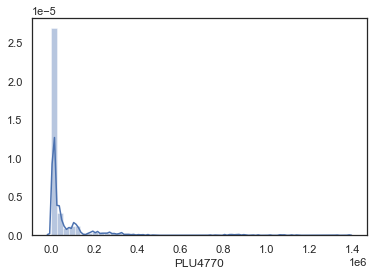

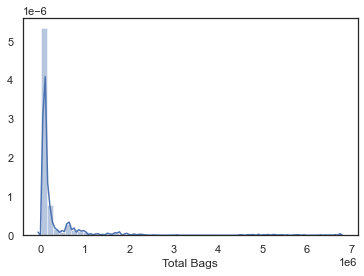

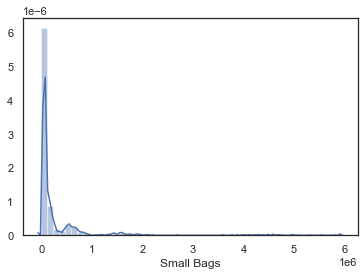

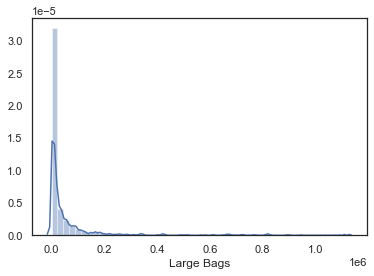

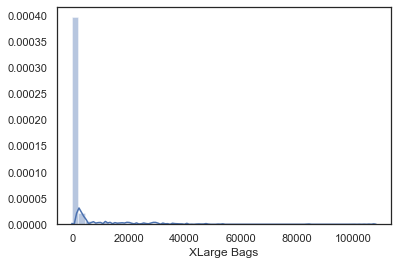

In [28]:
for i in col:
    sns.distplot(df[i])
    plt.show()

In [29]:
df.skew()

AveragePrice   -0.124827
Total Volume    6.187993
PLU4046         6.039720
PLU4225         6.382720
PLU4770         5.393519
Total Bags      5.355237
Small Bags      5.344031
Large Bags      5.133533
XLarge Bags     5.763088
dtype: float64

In [30]:
# Treating skewness via log method

for i in col:
    if df[i].skew()> 0.55:
        df[i] = np.log1p(df[i])

In [31]:
df.skew()

AveragePrice   -0.124827
Total Volume    0.661213
PLU4046        -0.162020
PLU4225         0.178192
PLU4770        -0.350017
Total Bags      0.691389
Small Bags      0.709931
Large Bags     -0.907645
XLarge Bags     0.783277
dtype: float64

## Removing the outliers

In [32]:
# Check the Outliers
from scipy.stats import zscore

# Take without categorical
z_score = abs(zscore(df))
print(df.shape)

df_final = df.loc[(z_score < 3).all(axis=1)]
print(df_final.shape)

(1511, 9)
(1495, 9)


## Model Training

Now our data are ready!

According to the data, our Target variable 'AveragePrice' is continuous, so our model is Regression.

Let's now begin to train out regression model! 

We will need to first split up our data into an X array that contains the features to train on, and y array with the target variable.

In [33]:
# Separationg independent & dependent variables

df_x = df_final.drop(columns=['AveragePrice'])
df_y = df_final['AveragePrice']

In [34]:
# Scaling the input variable

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

max_r_score = 0

for r_st in range(0, 50):
    x_train, x_test, y_train, y_test = train_test_split(x, df_y, random_state = r_st, test_size=0.2)
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    
    r2_scr = r2_score(y_test, y_pred)
    print('r2 : %s and random_state : %s' % (r2_scr, r_st) )
    
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_st = r_st
print('Max r2_score Corresponding to random state : %s is %s ' % (final_r_st, max_r_score))

r2 : 0.34237849774256224 and random_state : 0
r2 : 0.39181447155416105 and random_state : 1
r2 : 0.39837443377129444 and random_state : 2
r2 : 0.3264376205557916 and random_state : 3
r2 : 0.36643761696969646 and random_state : 4
r2 : 0.34817338742916015 and random_state : 5
r2 : 0.3587010745172021 and random_state : 6
r2 : 0.35139646886766795 and random_state : 7
r2 : 0.30441581663216344 and random_state : 8
r2 : 0.36775571142627483 and random_state : 9
r2 : 0.3550113981934555 and random_state : 10
r2 : 0.34513103887084207 and random_state : 11
r2 : 0.31338039232603876 and random_state : 12
r2 : 0.4243693347616805 and random_state : 13
r2 : 0.395121928306856 and random_state : 14
r2 : 0.40601399204984634 and random_state : 15
r2 : 0.37476377877411604 and random_state : 16
r2 : 0.2815961221587743 and random_state : 17
r2 : 0.3934376091999906 and random_state : 18
r2 : 0.41155789325924086 and random_state : 19
r2 : 0.4393629167275702 and random_state : 20
r2 : 0.3388227115928456 and rand

In [36]:
# Importing model Library

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Import Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
# Breaking input & target variables

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,df_y, test_size=.2, random_state=42)

In [38]:
# Using model via for loop

model = [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(), Lasso(), Ridge(), ElasticNet()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    m.fit(x_train, y_train)
    print('Score of %s Model is %s' % (m, m.score(x_train, y_train)))
    predm = m.predict(x_test)
    print('r2_score: %s' % (r2_score(y_test, predm)))
    print('\nBelow Errors of %s Model: ' % m)
    print('MAE: ', mean_absolute_error(y_test, predm))
    print('MSE : ', mean_squared_error(y_test, predm))
    print('RMSE : ', np.sqrt(mean_squared_error(y_test, predm)))


*************** LinearRegression() Model ***************

Score of LinearRegression() Model is 0.390266061644187
r2_score: 0.3800281949234502

Below Errors of LinearRegression() Model: 
MAE:  0.1093685449806139
MSE :  0.01987634003694298
RMSE :  0.1409834743398778

*************** DecisionTreeRegressor() Model ***************

Score of DecisionTreeRegressor() Model is 1.0
r2_score: 0.6352582776429188

Below Errors of DecisionTreeRegressor() Model: 
MAE:  0.07812709030100334
MSE :  0.011693645484949831
RMSE :  0.1081371605182503

*************** KNeighborsRegressor() Model ***************

Score of KNeighborsRegressor() Model is 0.8336400088553411
r2_score: 0.7590397091287064

Below Errors of KNeighborsRegressor() Model: 
MAE:  0.0648896321070234
MSE :  0.007725204013377924
RMSE :  0.08789313974012945

*************** SVR() Model ***************

Score of SVR() Model is 0.7433997840581701
r2_score: 0.693249679043255

Below Errors of SVR() Model: 
MAE:  0.07508297797356124
MSE :  0.0098

Observation: **_KNeighborsRegressor()_ Model is better because Errors are less than other model and r2_score is better than other models**

In [39]:
# Cross Validation

from sklearn.model_selection import cross_val_score

model = [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(), Lasso(), Ridge(), ElasticNet()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    cv_score = cross_val_score(m, x, df_y, cv=5, scoring = 'r2')
    print('Score of %s Model is %s' % (m, cv_score))
    print('Mean score: ', cv_score.mean())
    print('Std score : ', cv_score.std())
    print('Min score : ', cv_score.min())
    print('Max score : ', cv_score.max())


*************** LinearRegression() Model ***************

Score of LinearRegression() Model is [-0.28065203  0.12684795  0.37069001  0.40656281  0.15065537]
Mean score:  0.1548208231099198
Std score :  0.24511628615743783
Min score :  -0.2806520272180888
Max score :  0.406562805293714

*************** DecisionTreeRegressor() Model ***************

Score of DecisionTreeRegressor() Model is [-1.59419499 -0.47237226  0.14054692 -0.16657677  0.08724969]
Mean score:  -0.4010694809953136
Std score :  0.6348894931265773
Min score :  -1.5941949921810394
Max score :  0.14054692044964512

*************** KNeighborsRegressor() Model ***************

Score of KNeighborsRegressor() Model is [-0.74700279 -0.09597059  0.20562168 -0.06166818  0.35353151]
Mean score:  -0.06909767234072044
Std score :  0.37799969529961186
Min score :  -0.7470027862836399
Max score :  0.35353151365550595

*************** SVR() Model ***************

Score of SVR() Model is [-0.79204251  0.29731536  0.48995951 -0.1927644

Observation: **Ridge() scores are better than other model**

In [40]:
# Ridge model will give the best parameters using GridSearchCV

from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param = {'alpha': [0.001, 0.01, 0.1, 1], 'random_state':range(1,10)}
clf = GridSearchCV(ridge, param)
clf.fit(x, df_y)
clf.best_params_

{'alpha': 1, 'random_state': 1}

In [41]:
# using Ridge model with best results

ridge = Ridge(alpha=1, random_state=1)
ridge.fit(x_train, y_train)

print('Score is %s' % ridge.score(x_train, y_train))
predrd = ridge.predict(x_test)
print('\nBelow Errors ')
print('MAE: ', mean_absolute_error(y_test, predrd))
print('MSE : ', mean_squared_error(y_test, predrd))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, predrd)))
print('r2_score: %s' % (r2_score(y_test, predrd)))

Score is 0.3900473777716138

Below Errors 
MAE:  0.10931273096309016
MSE :  0.019866929769618787
RMSE :  0.14095009673504585
r2_score: 0.38032171477712484


In [42]:
score = cross_val_score(ridge, x, df_y, cv=5, scoring = 'r2')
print('Score is %s' % score)
print('Mean score: ', score.mean())
print('Std score : ', score.std())
print('Min score : ', score.min())
print('Max score : ', score.max())

Score is [-0.26314212  0.12145614  0.36561571  0.40882156  0.15004478]
Mean score:  0.15655921270793113
Std score :  0.23864818710816385
Min score :  -0.26314212222697053
Max score :  0.40882156482555443


## Using Ensemble Technique to Boostup our Score 

In [43]:
# Using RandomForest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, random_state=43)
rf.fit(x_train, y_train)
print('Score: ', rf.score(x_train, y_train))
predrf = rf.predict(x_test)
print('r2_score: %s' % (r2_score(y_test, predrf)))
print('\nBelow Errors ')
print('MAE: ', mean_absolute_error(y_test, predrf))
print('MSE : ', mean_squared_error(y_test, predrf))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, predrf)))

Score:  0.9676020465750093
r2_score: 0.8114186244314079

Below Errors 
MAE:  0.05754347826086956
MSE :  0.006045932274247492
RMSE :  0.07775559320233813


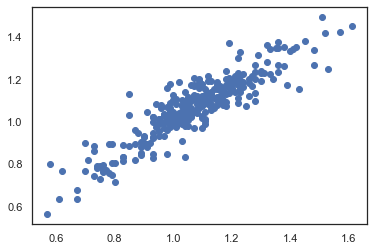

In [44]:
plt.scatter(x=y_test,y=predrf)

Observation: As we can see that we have a straight line so this is the best model we can apply on our data

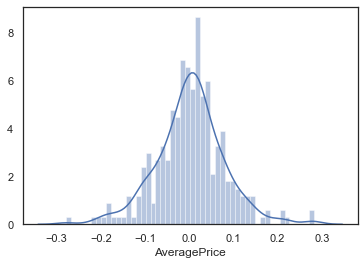

In [45]:
sns.distplot((y_test-predrf),bins=50)

Observation: Graph looked to be **normally distributed** and Its clearly says that our model was a correct choice for the data.

In [46]:
# Using Ada Boost

from sklearn.ensemble import AdaBoostRegressor

adb = AdaBoostRegressor(base_estimator=Ridge(), n_estimators=20, learning_rate=0.1, random_state=71)
adb.fit(x_train, y_train)
print('Score: ', adb.score(x_train, y_train))
predadb = adb.predict(x_test)
print('r2_score: %s' % (r2_score(y_test, predadb)))
print('\nBelow Errors ')
print('MAE: ', mean_absolute_error(y_test, predadb))
print('MSE : ', mean_squared_error(y_test, predadb))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, predadb)))

Score:  0.3850020489835969
r2_score: 0.3745658772954864

Below Errors 
MAE:  0.11023776700075193
MSE :  0.020051462327463576
RMSE :  0.14160318614870068


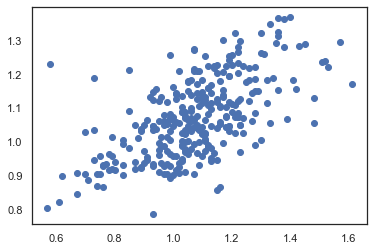

In [47]:
plt.scatter(x=y_test,y=predadb)

Observation: As we can see that we don't have a straight line so this is not the best model we can apply on our data

Observation: 
    1. Well as we can see the RMSE is lower than the AdaBoost model, so the RandomForest Regressor is the best model in this case
    2. RandomForestRegressor is working well beacuse it gives the best r2_score and also it is not suffering from overfitting and Underfitting

In [48]:
# Cross_validation
cv_score = cross_val_score(rf, x, df_y, cv=5, scoring = 'r2')
print('Score : %s' % (cv_score))
print('Mean score: ', cv_score.mean())
print('Std score : ', cv_score.std())
print('Min score : ', cv_score.min())
print('Max score : ', cv_score.max())

Score : [-0.35732083  0.06546615  0.53691302  0.0380657   0.31208293]
Mean score:  0.11904139659008658
Std score :  0.2994094428224907
Min score :  -0.3573208302447288
Max score :  0.5369130225702493


In [49]:
# Saving the predicted value to .csv

prediction = pd.DataFrame(predrf, columns=['Predictions']).to_csv('Data/Predicted_avocado.csv')
prediction

In [50]:
# Saving RandomForestRegressor

import joblib
joblib.dump(rf, 'rf_avocado.pkl')

['rf_avocado.pkl']

## Conclusion Result:

I gone through analysis which model will be work with better accuracy with the help of **low residual and RMSE scores.**

We can see that there is a huge r2_score difference when we use the **Ensemble Method**

We tried a Grid Search then using the Ensemble Method, to find the best Hyperprarameters!

Here, our Hyperparamter Tuning was more focussed on Getting a Better **r2 Score! -> 81% overall**